<a href="https://colab.research.google.com/github/airoud/ML-Classfication-Models/blob/main/Breast_Cancer_Detection_Using_SVM_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection

## Dataset Information
---
## Attribute Information
---






In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('breastCancer.csv')
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
df.shape

(699, 11)

In [4]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

## Data Preprocessing

In [5]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
df[df['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [7]:
df.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [8]:
df[~df['bare_nucleoli'].str.isdigit()]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [9]:
df['bare_nucleoli'].replace('?',np.nan,inplace=True)
df

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [11]:
df[df['bare_nucleoli'].isna()]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [15]:
df['bare_nucleoli'].median()

1.0

In [27]:
df = df.fillna(df.median())
df.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [26]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype(int)
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

## Exploratory Data Analysis

In [29]:
df.drop('id', axis=1, inplace=True, errors='ignore')
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Bivariate Analysis

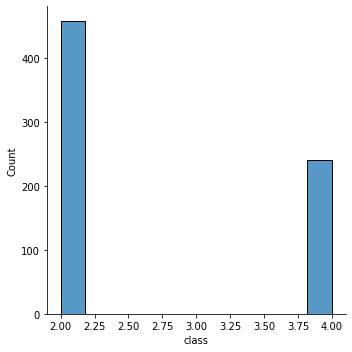

In [36]:
sns.displot(df['class']);

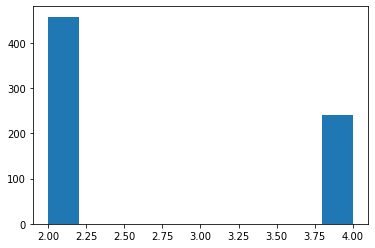

In [35]:
plt.hist(df['class']);

### Multivariate Data Analysis

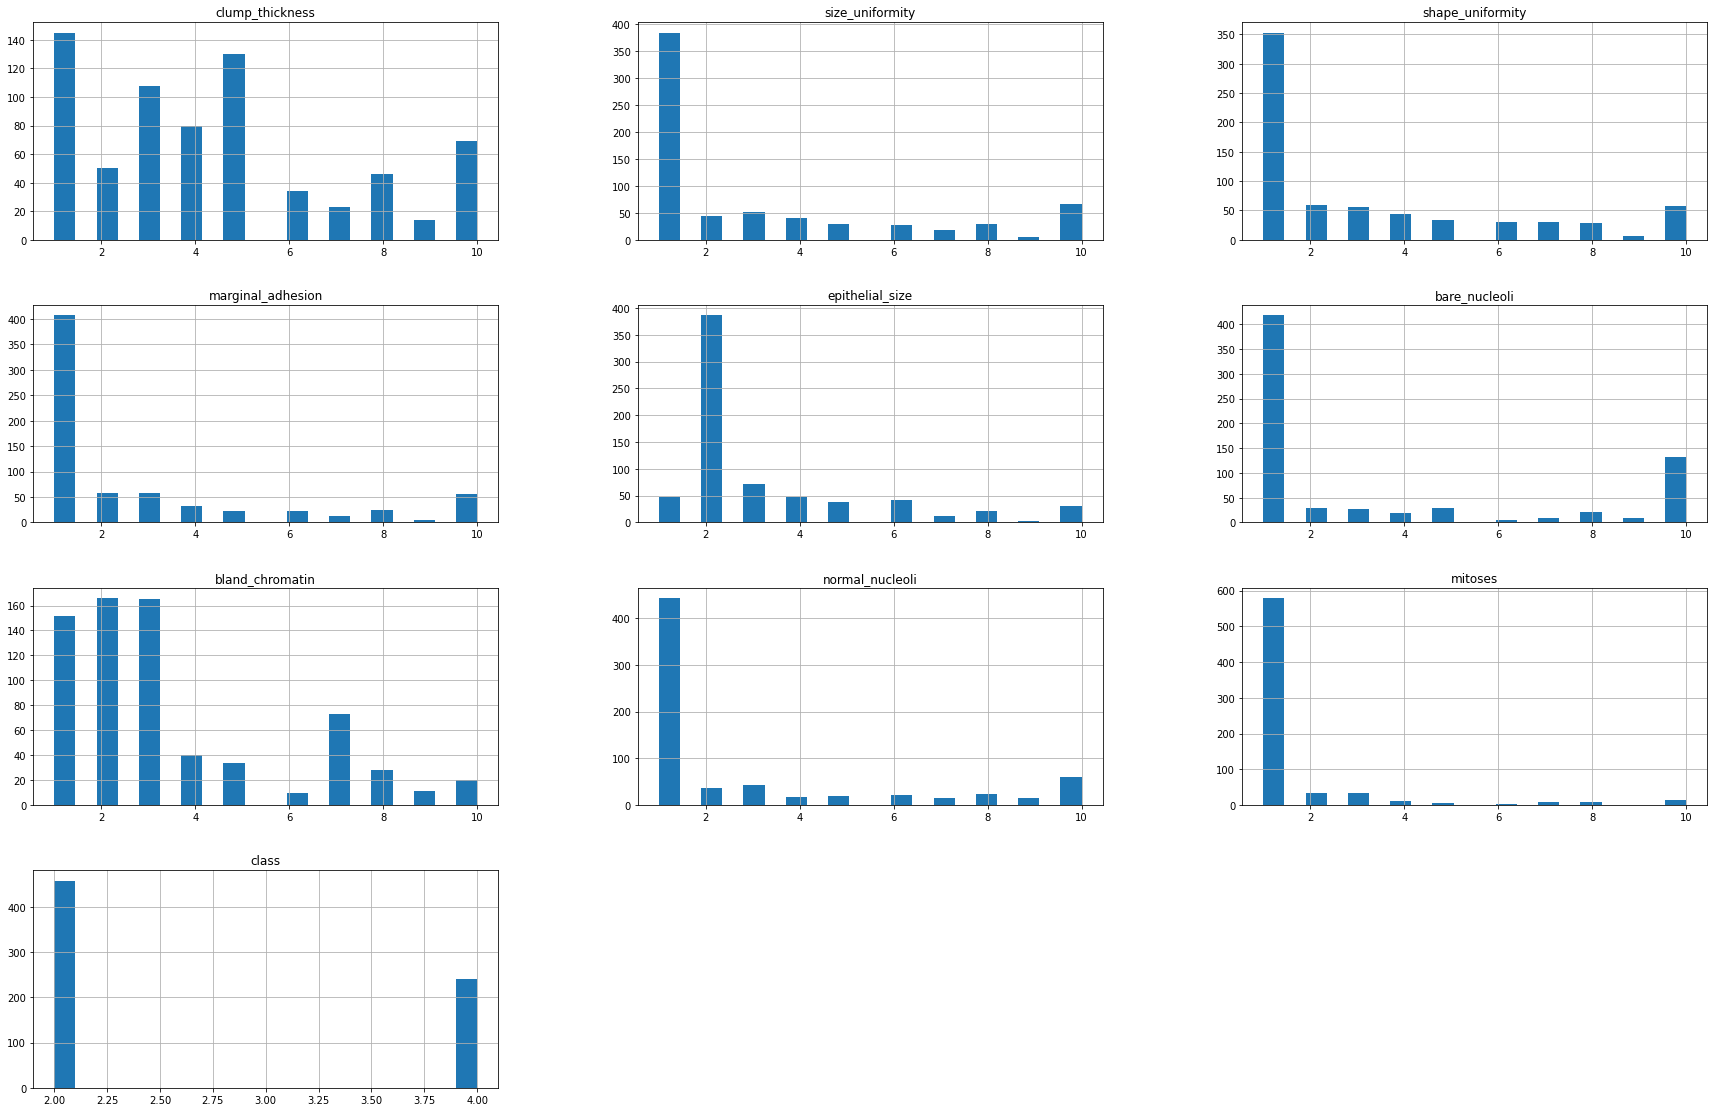

In [41]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

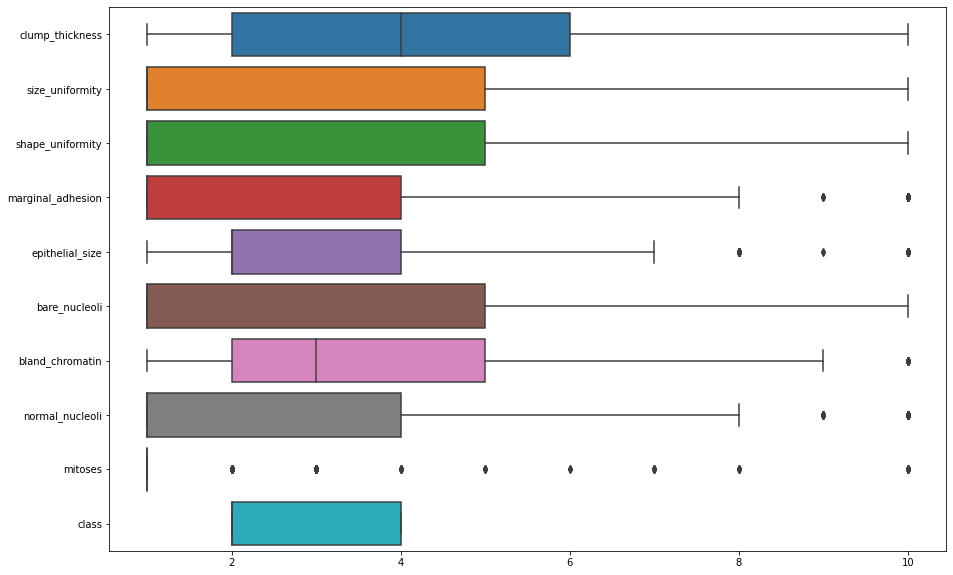

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient='h')
plt.show()

In [49]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


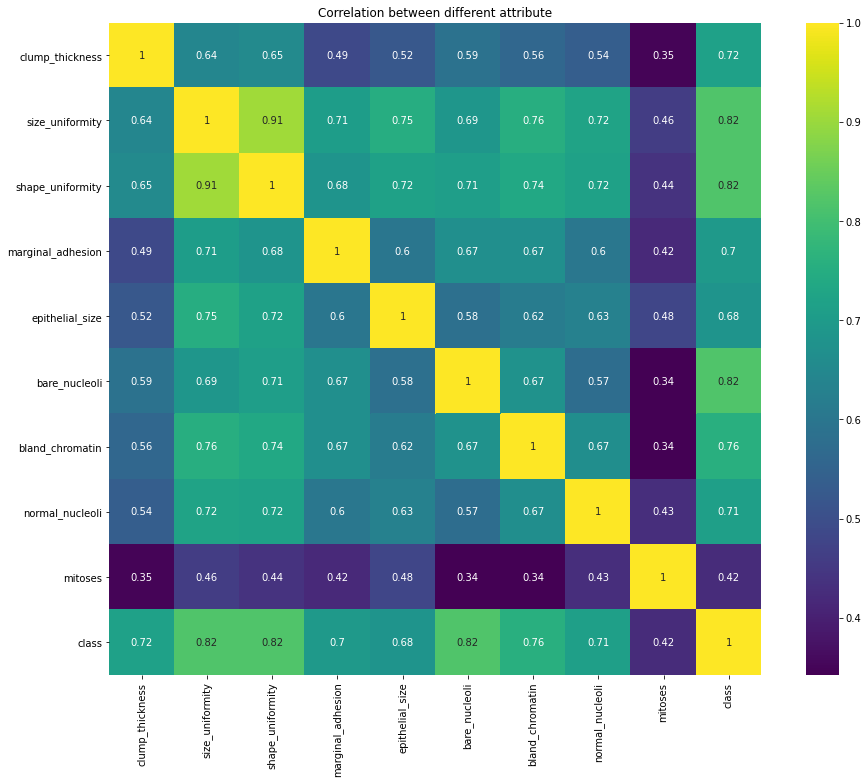

In [55]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, square=True, cmap='viridis')
plt.title('Correlation between different attribute')
plt.show()

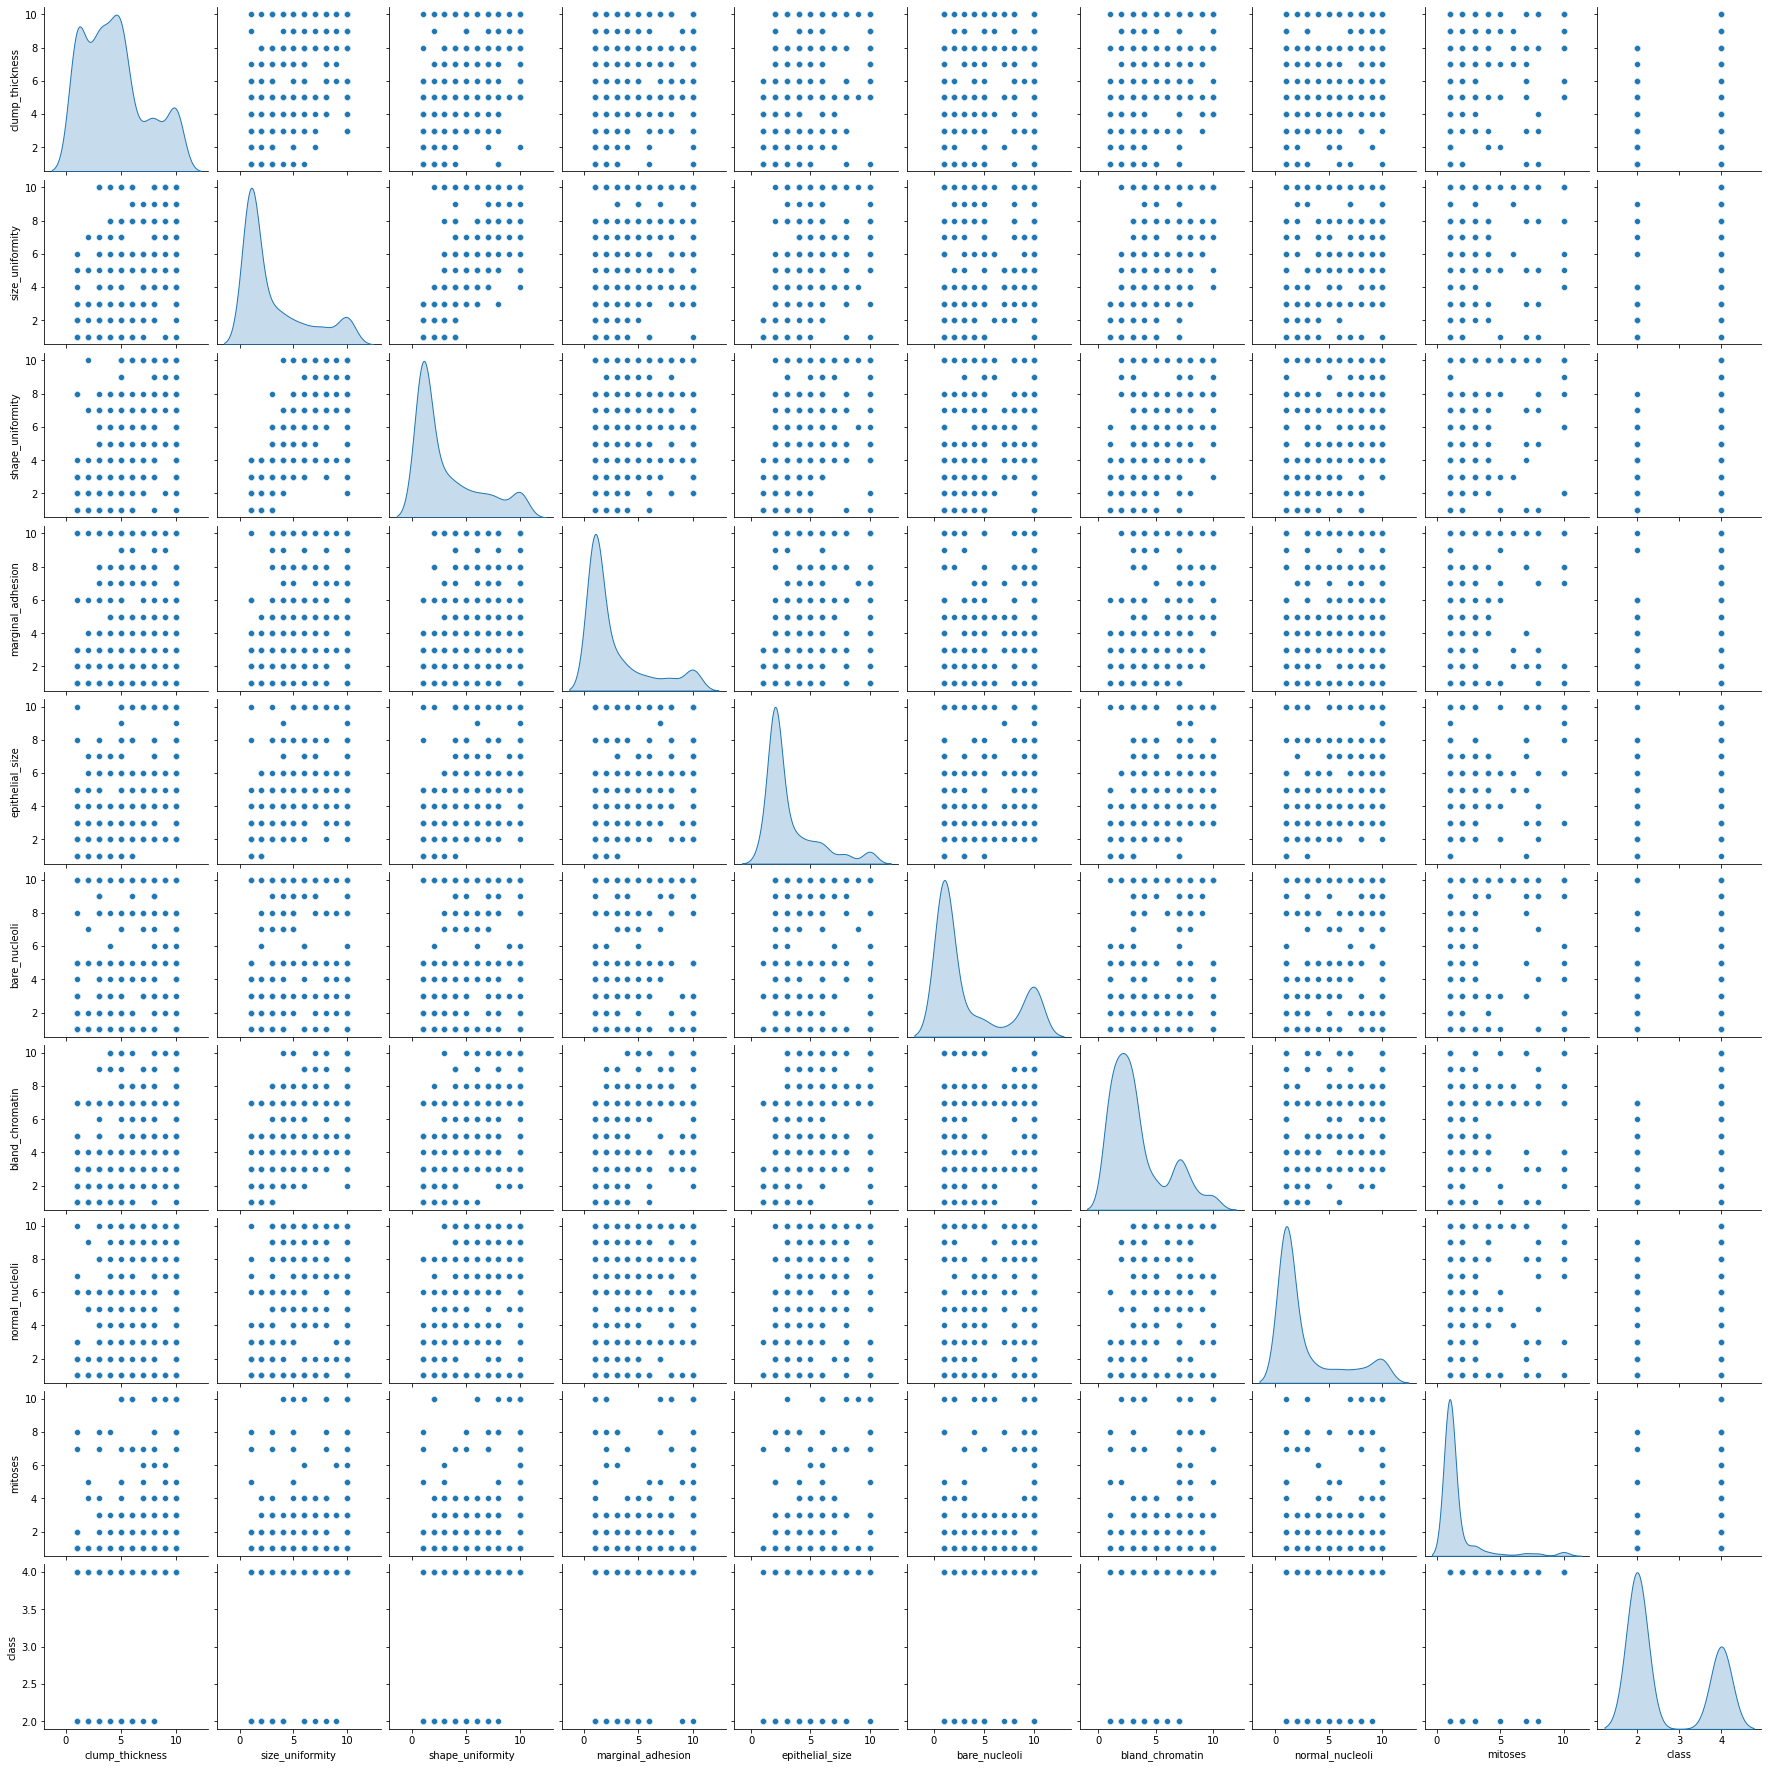

In [56]:
sns.pairplot(df, diag_kind='kde');f

## Building The Model

In [57]:
X=df.drop('class', axis=1)
y=df['class']

In [60]:
from sklearn.model_selection import train_test_split
# Split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2 )

### KNNeighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier 

In [63]:
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [64]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [65]:
KNN_model.score(X_train, y_train)

1.0

In [112]:
KNN_prediction = KNN_model.predict(X_test)

In [72]:
from scipy.stats import zscore

print('KNeighbors CLassifier is predicting at:{0:.2g}%'.format(KNN_model.score(X_test, y_test)*100))

KNeighbors CLassifier is predicting at:96%


### Suppect Vector Machine

In [74]:
from sklearn.svm import SVC

svc_model = SVC(gamma=0.025, C=3)
svc_model.fit(X_train, y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
svc_model.score(X_train, y_train)

0.9877300613496932

In [111]:
svc_prediction= svc_model.predict(X_test)

In [82]:
print('Support Vector Algorithm  is predicting at:{0:.2g}%'.format(svc_model.score(X_test, y_test)*100))

Support Vector Algorithm is predicting at:94%


In [117]:
knn_prediction = pd.DataFrame(KNN_prediction)
svc_prediction = pd.DataFrame(svc_prediction)

In [118]:
df1=pd.concat([knn_prediction,svc_prediction], axis=1)
df1

,0,0
0,4,4
1,4,4
2,2,2
3,2,2
4,2,2
...,...,...
205,4,4
206,2,2
207,2,4
208,2,2


In [119]:
df1.columns=['knn_prediction','svc_prediction']
df1

,knn_prediction,svc_prediction
0,4,4
1,4,4
2,2,2
3,2,2
4,2,2
...,...,...
205,4,4
206,2,2
207,2,4
208,2,2


In [91]:
from sklearn.metrics import classification_report

In [120]:
print('KNN Classfication Report')
print(classification_report(y_test, knn_prediction))

KNN Classfication Report
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       142
           4       0.93      0.94      0.93        68

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [121]:
print('SVC Classification report')
print(classification_report(y_test, svc_prediction))

SVC Classification report
              precision    recall  f1-score   support

           2       0.97      0.94      0.96       142
           4       0.89      0.94      0.91        68

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



Confusion matrix for KNN Classifier  



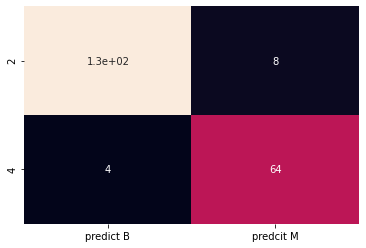

In [113]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for KNN Classifier  \n')
cm_knn =confusion_matrix(y_test, KNN_prediction)
df_cm_knn = pd.DataFrame(cm , index = ['2','4'],columns=['predict B', 'predcit M'])
sns.heatmap(df_cm_knn, annot=True, cbar=False)
plt.show()

Confusion matrix for SVC  



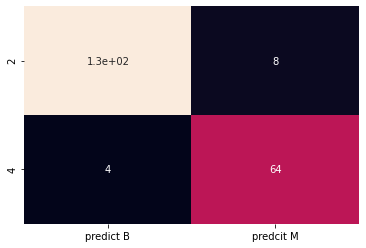

In [114]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for SVC  \n')
cm_svc =confusion_matrix(y_test, svc_prediction)
df_cm_svc = pd.DataFrame(cm_svc, index = ['2','4'],columns=['predict B', 'predcit M'])
sns.heatmap(df_cm_svc, annot=True, cbar=False)
plt.show()